# Titanic

In [2]:
%matplotlib inline
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = "data/titanic"

In [245]:
df_raw = pd.read_csv(f"{PATH}/train.csv", low_memory=False)
df_raw_test = pd.read_csv(f"{PATH}/test.csv", low_memory=False)
df_raw.drop(["PassengerId"], inplace=True, axis=1)

In [228]:
df_raw

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [193]:
df_raw.transpose()

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
Age,22,38,26,35,35,NaN,54,2,27,14,...,33,22,28,25,39,27,19,NaN,26,32
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13,30,23.45,30,7.75


In [16]:
df_raw.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [17]:
df_raw.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,  4.  , 58.  , 20.  , 39.  , 55.  ,
       31.  , 34.  , 15.  , 28.  ,  8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  , 25.  ,  0.83, 30.  , 33.  , 23.  ,
       24.  , 46.  , 59.  , 71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  , 55.5 ,
       40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,
        0.92, 43.  , 60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  , 24.5 ,  6.  ,
        0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [18]:
df_raw.Fare.dtype

dtype('float64')

In [19]:
df_raw.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52',
       'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31', 'D36', 'D15',
       'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91',
       'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92',
       'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9',
       'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101',

In [246]:
def get_section(cabin):
    if pd.isna(cabin):
        return None
    else:
        return cabin[0]
    
def num_cabins(cabin):
    if pd.isna(cabin):
        return None
    else:
        return len(cabin.split(" "))
        
def add_cabin_features(df):
    df["HasCabin"] = df.Cabin.notnull()
    df["CabinSection"] = [get_section(name) for name in df.Cabin.values]
    df["NumCabins"] = [num_cabins(name) for name in df.Cabin.values]
    
def tointorzero(s):
    try:
        return int(s)
    except Exception as e:
        return 0

def add_ticket_features(df):
    df["TicketNumber"] = [max([tointorzero(s) for s in ticket.split(" ")]) for ticket in df.Ticket]
    
add_cabin_features(df_raw)
add_cabin_features(df_raw_test)
add_ticket_features(df_raw)
add_ticket_features(df_raw_test)

## Put strings into categories

In [247]:
proc_df(df_raw)

[     Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket      Fare  Cabin  \
 0           0       3   109    2  22.0      1      0     524    7.2500      0   
 1           1       1   191    1  38.0      1      0     597   71.2833     82   
 2           1       3   354    1  26.0      0      0     670    7.9250      0   
 3           1       1   273    1  35.0      1      0      50   53.1000     56   
 4           0       3    16    2  35.0      0      0     473    8.0500      0   
 5           0       3   555    2  28.0      0      0     276    8.4583      0   
 6           0       1   516    2  54.0      0      0      86   51.8625    130   
 7           0       3   625    2   2.0      3      1     396   21.0750      0   
 8           1       3   413    1  27.0      0      2     345   11.1333      0   
 9           1       2   577    1  14.0      1      0     133   30.0708      0   
 10          1       3   728    1   4.0      1      1     617   16.7000    146   
 11          1  

In [231]:
df_raw.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'HasCabin', 'CabinSection', 'NumCabins',
       'TicketNumber'],
      dtype='object')

In [248]:
X, y, nas = proc_df(df_raw, "Survived")
X_test, _, nas_test = proc_df(df_raw_test, na_dict=nas)

In [154]:
??proc_df

## Train/validate split

In [249]:
X_train, X_valid = sklearn.model_selection.train_test_split(X, shuffle=False)
y_train, y_valid = sklearn.model_selection.train_test_split(y, shuffle=False)

In [204]:
?sklearn.model_selection.train_test_split

1.0
0.8878923766816144


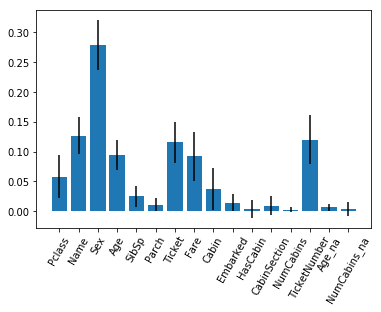

In [250]:
m = RandomForestClassifier(n_estimators=250, max_features=10)
m.fit(X_train, y_train)
print(m.score(X_train, y_train))
print(m.score(X_valid, y_valid))

importances = m.feature_importances_
std = np.std([tree.feature_importances_ for tree in m.estimators_], axis=0)

plt.bar(np.arange(len(importances)), importances, yerr=std)
plt.xticks(np.arange(len(importances)), X_train.columns, rotation=60)
plt.show()

1.0
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


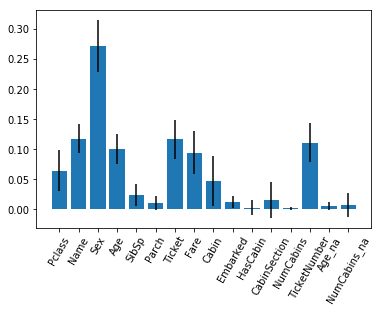

In [251]:
m = RandomForestClassifier(n_estimators=250, max_features=10)
m.fit(X, y)

importances = m.feature_importances_
std = np.std([tree.feature_importances_ for tree in m.estimators_], axis=0)

print(m.score(X, y))
print(m)
plt.bar(np.arange(len(importances)), importances, yerr=std)
plt.xticks(np.arange(len(importances)), X.columns, rotation=60)
plt.show()

# Predict test data

In [253]:
survived = m.predict(X_test.drop(["PassengerId"], axis=1))
ids = X_test.PassengerId
print("PassengerId,Survived")
for (id, s) in zip(ids, survived):
    print(f"{id},{s}")

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1
911,1
912,0
913,1
914,1
915,0
916,1
917,0
918,1
919,0
920,1
921,0
922,0
923,0
924,1
925,0
926,1
927,0
928,0
929,0
930,0
931,1
932,0
933,0
934,0
935,1
936,1
937,0
938,1
939,0
940,1
941,0
942,1
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,1
957,1
958,1
959,0
960,1
961,1
962,1
963,0
964,1
965,1
966,1
967,0
968,0
969,1
970,0
971,1
972,1
973,0
974,0
975,0
976,0
977,0
978,1
979,0
980,1
981,1
982,0
983,0
984,1
985,0
986,0
987,0
988,1
989,0
990,1
991,0
992,1
993,0
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,1
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,1
1018,0
1019,1
1020,0
1021,0
1022,0
1023,0
1024,0
1025,0
1026,0
1027,0
1028,0
1029,0
1030,1
1031,0
1032,0
1033,1
1034,0
1035,0
1036,0
1037,0
1038,1
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,1
1046,0
10

## Compare with gender data before submission

In [217]:
df_gender = pd.read_csv(f"{PATH}/gender_submission.csv")

In [220]:
df_gender.Survived.values

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 

In [254]:
print(np.array(survived))

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0]


In [255]:
np.mean(df_gender.Survived.values == survived)

0.8732057416267942

We agree with the gender submission example in most cases, which indicates that the gender is a very strong predictor, as expected.

### Result for now: 0.78 accuracy.